# IBM - Statistics for Data Science with Python

# 0. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

# 1. Loading Dataset

The following describes the dataset variables:

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url).drop(['Unnamed: 0'], axis = 1)

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# 2. Descriptive Statistics and Visualizations

#### 2.1 For the "Median value of owner-occupied homes" provide a boxplot

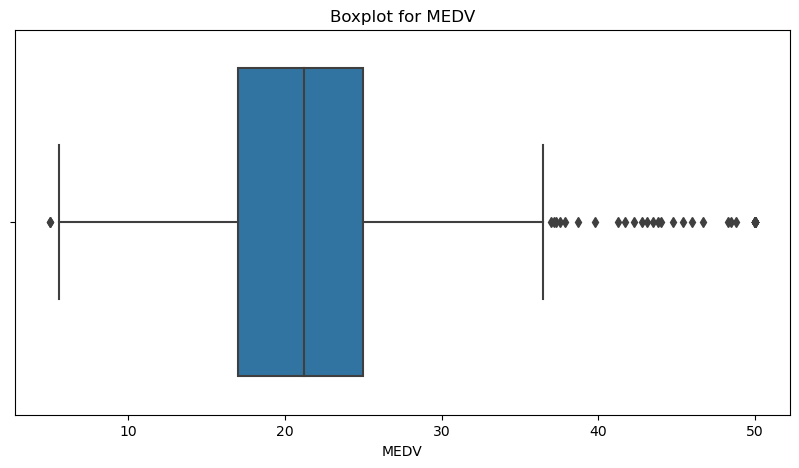

In [4]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

As we can see, median value is close to 20K dollars, and there are some outliers with a maximum value close to 50K dollars. 

#### 2.2 Provide a  bar plot for the Charles river variable

In [5]:
temp = boston_df.groupby(['CHAS']).size().reset_index()
temp.columns = ['CHAS','value']

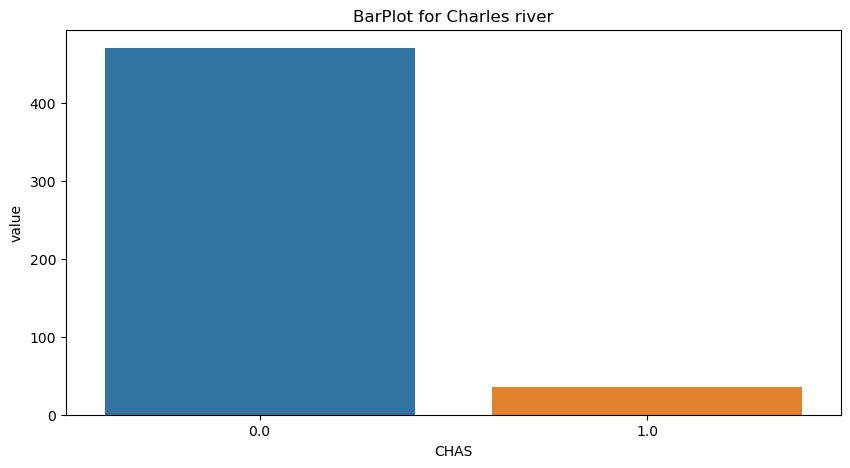

In [6]:
#Provide a histogram for the Charles river variable
plt.figure(figsize=(10,5))
sns.barplot(temp, x="CHAS", y="value")
plt.title("BarPlot for Charles river")
plt.show()

Apparently, there are way more houses which do not border with Charles river (93% vs only 7% bordering the river)

#### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

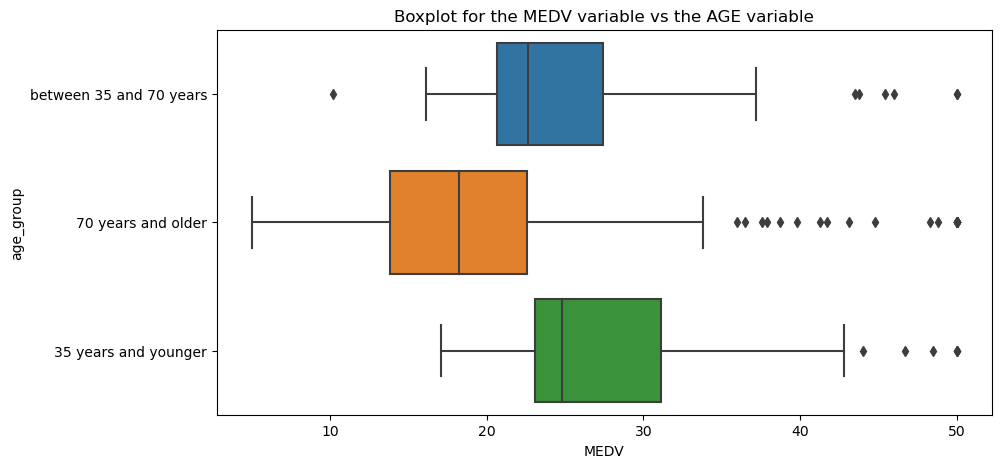

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

From boxplot analysis, seems that the oldest houses are also the ones with lower median values. However, there is not such a huge difference between the other two categories, even though newest houses still seem to be slightly more expensive compared to the middle-aged ones.

#### 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

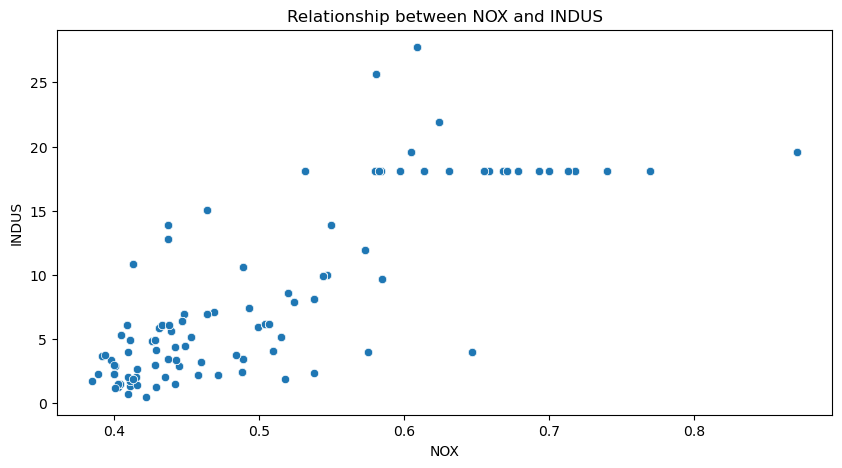

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

From the scatterplot, it seems that there is a linear relationship between variables NOX and INDUS, since we can clearly see that when value of NOX is increasing, the same thing is happening for variable INDUS. Further investigations are clearly needed, but this gives us a first hint of the possible relation between the two variables.

#### 2.5 Create a histogram for the pupil to teacher ratio variable

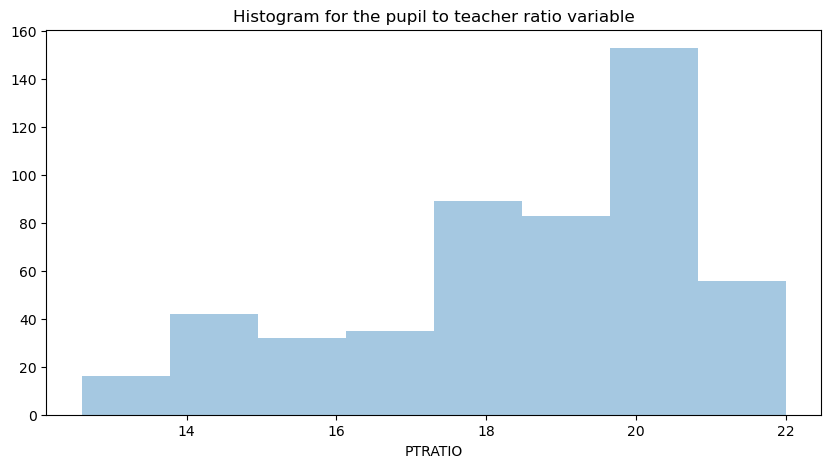

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.PTRATIO,bins=8, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

PTRATIO seems to increase within the range 15-19, makes a higher score in 20, and then finally it decreases from the ratio of 21

# 3. Statistical Analysis

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

#### 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis (H0): Both average MEDV are the same

Alternative Hypothesis (H1): Both average MEDV are NOT the same

In [11]:
print(boston_df[boston_df["CHAS"] == 0]["MEDV"].mean())
print(boston_df[boston_df["CHAS"] == 1]["MEDV"].mean())

22.093842887473464
28.439999999999998


First, Levene's test will be conducted to determine if the two groups have equal variances.

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   center='mean'
)

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The P value of Levene's test is less than 0.05, so we have to reject the null hzypothesis and assume the two populations do not have equal variances.

The t-test is then conducted, with equal_var = False

In [13]:
not_bound = boston_df[boston_df["CHAS"] == 0]["MEDV"]
bound = boston_df[boston_df["CHAS"] == 1]["MEDV"]

scipy.stats.ttest_ind(not_bound,bound,equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since p-value is lower than alpha value of 0.05, we can reject the Null hypothesis and say that there a significant difference in median value of houses bounded by the Charles river.

#### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis (H0): The three population means are equal

Alternative Hypothesis (H1):  At least one of the means differ

In [14]:
print(boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"].mean())
print(boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"].mean())
print(boston_df[boston_df["age_group"] == '70 years and older']["MEDV"].mean())

27.77582417582417
24.94765625
19.793379790940765


Again, we have to conduct Levene's to assess one of the most important assumptions to take ANOVA's results as valid: we have to determine if there is equality of variance between the three groups.

In [15]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

P-value is greater than 0.05, so we can assume equality of variance between the three groups. Now, let's run the ANOVA test.

In [16]:
young = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
old = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

f_stats, p_value = scipy.stats.f_oneway(young,mid,old)

print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Again, since p-value is lower than alpha value of 0.05, we can reject the Null hypothesis and say that at least one of the means between the discretized age-groups differs.

#### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis (H0): NOX is not correlated with INDUS

Alternative Hypothesis (H1): NOX is correlated with INDUS

In [17]:
nox = boston_df["NOX"]
indus = boston_df["INDUS"]

pearson,p_value = scipy.stats.pearsonr(nox, indus)

print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209149, P-value=7.913361061242812e-98


Since the p-value is again lower than alpha value of 0.05, we can reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

#### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis (H0): weighted distances to the five Boston employment centres are not related to median value

Alternative Hypothesis (H1): weighted distances to the five Boston employment centres are related to median value

In [18]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        16:52:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Firstly, The P-value 1.21e-08 is less than 0.05, so we can reject the null hypothesis and say that distance to employment centres does have an impact on median home values.

Also, from what the model is saying, there is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.